In [3]:

import fsps
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, interp
from scipy import integrate
from collections import OrderedDict


%matplotlib inline

## Jiani and César

We are using Charlie Conroy's Flexible Stellar Population Synthesis for Python (http://dfm.io/python-fsps/current/)
as a stellar population synthesis code.

In [4]:
#generate the sed model using fsps, with the required paramets: age, redshift, igm absorption, etc
sp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1, zred = 3.0,
                                sfh=3, logzsol=0.0, dust_type=2, dust2=0.2,add_igm_absorption= True)

In [5]:
#testing the naarray for inputing the sfr in each age
print(np.ndarray((11,), buffer=np.array(np.linspace(0,1,11)),dtype=float))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [6]:
#setting the constant sfr = 5 Msun/year
sp.set_tabular_sfh(np.ndarray((11,), buffer=np.array(np.linspace(0,1,11)),dtype=float), np.ndarray((11,), buffer=np.array(11*[5]),dtype=int))

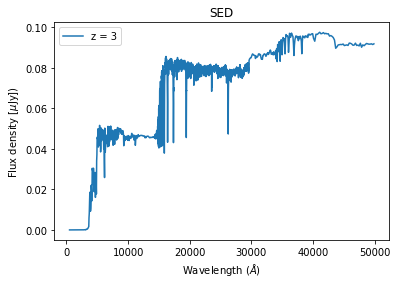

In [21]:
#getting and plotting the sed versus wavelength (flux in unit of micro Jansky)
wave, spec = sp.get_spectrum(tage=0.5)
#we get the distance from z =3 http://www.astro.ucla.edu/~wright/CosmoCalc.html, and convert from Mpc to cm
sed = spec*3.83*10**33/4/np.pi/(25924*10**6*3.08*10**18)**2/10**(-29)
z =3
wave_z3 = wave * (z+1)
#plt.yscale('log')
#print(wave, sed)
# plt.plot(wave[np.where((wave >= 500) & (wave <= 50000))], sed[np.where((wave >= 500) & (wave <= 50000))],
#          label = 'z = 0')
plt.plot(wave_z3[np.where((wave_z3 >= 500) & (wave_z3 <= 50000))], 
         sed[np.where((wave_z3 >= 500) & (wave_z3 <= 50000))],label = 'z = 3')

plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel(r"Flux density [$\mu$Jy])")
plt.title('SED')
plt.legend()
plt.show()

In the above plot, we show the SED directly computed from the stellar population, with the desired parameters. 

In [22]:
print (sed[np.where((wave_z3 >= 500) & (wave_z3 <= 50000))])
print (spec)
print len(wave_z3)

[4.7806114947419474e-67 4.7806114947419474e-67 4.7806114947419474e-67 ...
 0.09178729988390044 0.09142295651829754 0.09178121251936017]
[1.00000000e-70 1.00000000e-70 1.00000000e-70 ... 7.91987913e-08
 7.71022580e-08 7.51129906e-08]
5994


In [23]:
print (sed)
print len(sed)
np.savetxt('sed.txt',sed)
np.savetxt('lamb.txt',wave_z3)

[4.7806114947419474e-67 4.7806114947419474e-67 4.7806114947419474e-67 ...
 0.00037861865199026115 0.00036859594109766084 0.0003590860262741679]
5994


FSPS has the filter functions incorporated, and we can use the getmags command to get the magnitudes through each filter, with this stellar population. From the magnitudes, we get the photometric fluxes.

In [24]:
filtername = ['wfc_acs_f435w','wfc_acs_f606w','wfc_acs_f775w','wfc_acs_f850lp','wfc3_ir_f105w','wfc3_ir_f125w',
             'wfc3_ir_f160w','jwst_f200w','jwst_f277w','jwst_f356w','jwst_f444w']
mag = sp.get_mags(tage=0.5, bands=filtername)
print (mag)
janskyflux = 10**((48.6+mag)/(-2.5))/10**(-29)
print (janskyflux)

[26.48553913 25.77829278 25.68137193 25.66988182 25.70807518 25.70423185
 25.35301391 25.10535654 25.10094118 24.95894819 24.93217186]
[0.09242391 0.17728945 0.19384349 0.19590579 0.18913414 0.18980483
 0.26229767 0.32950149 0.3308442  0.37706891 0.38648377]


Now we plot the filter functions we used:

transmission len 10000
transmission len 10000
transmission len 10000
transmission len 10000
transmission len 9001
transmission len 9000
transmission len 9001
transmission len 907
transmission len 1425
transmission len 1346
transmission len 1452


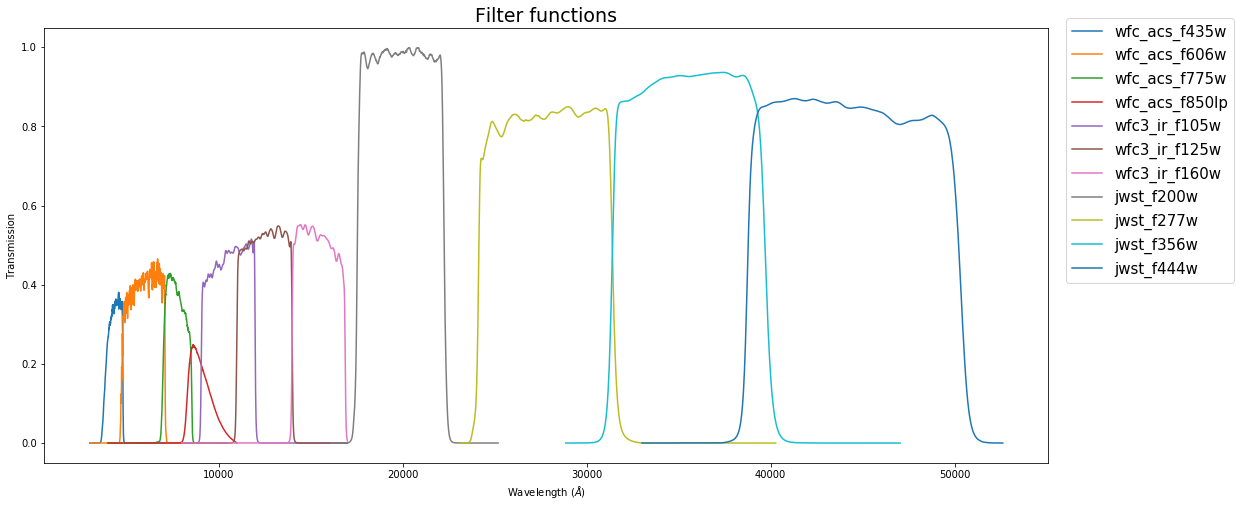

In [25]:
#plotting the filter curves we used
wavelength_list =[]
transmission_list = []
for filter_name in filtername:
    g = fsps.get_filter(filter_name)
    wavelength,transmission = g.transmission
    print 'transmission len', len(transmission)
    plt.xlabel(r"Wavelength ($\AA$)")
    wavelength_list.append(wavelength)
    transmission_list.append(transmission)
    plt.ylabel("Transmission")
    plt.plot(wavelength,transmission,label=filter_name)
    plt.gcf().set_size_inches(18, 8)
    plt.legend(bbox_to_anchor=(1.01, 1.04),loc=2,fontsize=15)
    plt.title('Filter functions',fontsize=19)

In [36]:
filters = []
filters.append(fsps.get_filter('wfc_acs_f435w'))
filters.append(fsps.get_filter('wfpc2_f606w'))
filters.append(fsps.get_filter('wfc3_uvis_f775w'))
filters.append(fsps.get_filter('wfc3_uvis_f850lp'))
filters.append(fsps.get_filter('wfc3_ir_f105w'))
filters.append(fsps.get_filter('wfc3_ir_f125w'))
filters.append(fsps.get_filter('wfc3_ir_f160w'))
filters.append(fsps.get_filter('jwst_f200w'))
filters.append(fsps.get_filter('jwst_f277w'))
filters.append(fsps.get_filter('jwst_f356w'))
filters.append(fsps.get_filter('jwst_f444w'))
# print fsps_filters

# mags = sp.get_mags(tage=0.5, bands=[f.name for f in filters])
# print mags

Finally, we plot the mags we obtained from this SED (thanks to Dave for the tip):

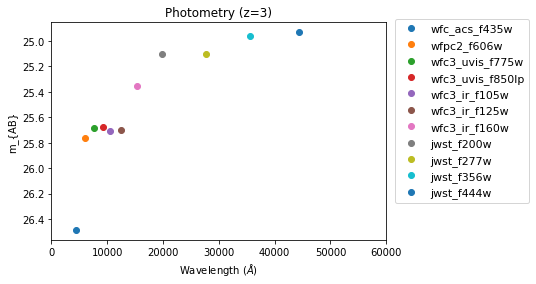

In [37]:
for i,m in enumerate(mags):
    plt.plot(filters[i].lambda_eff,m,'o', label=filters[i].name)
    
plt.title("Photometry (z=3)")
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel(r"m_{AB}")
plt.xlim([0,60000])
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.01, 1.04),loc=2,fontsize=11,numpoints=1)
plt.show()

## Computing the Lyman Continuum photon rate

Now, we will compute the production rate of Lyman continuum photons. We create a new stellar population without IGM absorption, and at redshift 0.

In [38]:
sp2 = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1, zred = 0.,
                                sfh=3, logzsol=0.0, dust_type=2, dust2=0.2,add_igm_absorption= False)

In [40]:
mag2 = sp2.get_mags(tage=0.5, bands=filtername)
print (mag2)

janskyflux = 10**((48.6+mag2)/(-2.5))/10**(-29)
print (janskyflux)

[-20.39227101 -20.40637457 -20.47575605 -20.57799676 -20.59884717
 -20.57087148 -20.60353298 -20.48635863 -20.0122707  -20.30747853
 -19.64184572]
[5.21084797e+17 5.27897770e+17 5.62733047e+17 6.18299227e+17
 6.30287751e+17 6.14254844e+17 6.33013820e+17 5.68255242e+17
 3.67204742e+17 4.81938267e+17 2.61058769e+17]


Finally, we compute the Lyman continuum photon rate, integrating the spectrum blueward of 912 Angstroms

In [41]:
photonrate = integrate.simps(fint, wave2[np.where((wave2 >= 0) & (wave2 <= 912))] )
print ('The Lyman continuum photon rate is', photonrate)


('The Lyman continuum photon rate is', 1.4723406173320497e+53)
